# This notebook covers phylogenetic tree vizualization using Bio.Phylo package and analysis of the tree
## The aims are:
1. Vizualise the tree using Phylo package of biophython
2. Anylyse the tree and study cases of multifarcation, And
3. Attempt to remove some terminal nodes from a multifurcated terminal node

In [1]:
%%bash
pwd
conda env list
which python && python -V

/home/kibet/bioinformatics/github/co1_metaanalysis/code
# conda environments:
#
                         /home/kibet/bioinformatics/anaconda3
                         /home/kibet/bioinformatics/anaconda3/envs/anaconda3_env
                         /home/kibet/bioinformatics/anaconda3/envs/biopython
base                  *  /home/kibet/bioinformatics/anaconda3/envs/coi_env
                         /home/kibet/bioinformatics/anaconda3/envs/py2_env
                         /home/kibet/bioinformatics/anaconda3/envs/qiime_env

/home/kibet/bioinformatics/anaconda3/envs/coi_env/bin/python


Python 3.6.8 :: Anaconda, Inc.


In [2]:
import matplotlib
#help(matplotlib)
import networkx
#help(networkx)
import Bio
#help(Bio)

from Bio import Phylo
#help(Phylo)

## Parsing a tree with recursive sub-trees
> Printing the tree object as a string "print" and  
> Drawing the tree in  simple ASCII-art (plain text) dendrogram

In [3]:
trees = Phylo.parse("/home/kibet/bioinformatics/github/co1_metaanalysis/data/output/alignment/pasta_output/aligned/COI_testa00_data.tre","newick")
for tree in trees:
    #print(tree)
    Phylo.draw_ascii(tree)

    _ STBOB358-08|Lepidoptera|gs-Bunaea|sp-...
  _|
 | |__ STBOD830-09|Lepidoptera|gs-NA|sp-NA|s...
 |
 | ____ LBEOW2067-11|Lepidoptera|gs-NA|sp-NA|...
 ||
 ||__ SPTOL260-09|Lepidoptera|gs-Leptoclani...
 |
 |__ SSDB098-07|Lepidoptera|gs-Bunaeopsis|...
 |
 | __ SPPDA050-07|Lepidoptera|gs-Usta|sp-Us...
 ||
 ||_ LBEOA276-11|Lepidoptera|gs-NA|sp-NA|s...
 |
 |  _ GBGL17153-15|Lepidoptera|gs-Syllepte|...
 |,|
 |||___ GMKMH424-15|Lepidoptera|gs-NA|sp-NA|s...
 ||
 ||  _ STBOB760-08|Lepidoptera|gs-Tagoropsis...
 || |
 || | ______ ACRJP041-09|Lepidoptera|gs-Acraea|sp-...
 || ||
 ||_||___ STBOB770-08|Lepidoptera|gs-Lobobunaea...
 || |
 || | __ MINE366-12|Lepidoptera|gs-NA|sp-NA|su...
 || ||
 ||  |___ LBAFR020-07|Lepidoptera|gs-Dactylocer...
 ||
 ||   _ LSER315-06|Lepidoptera|gs-Sphingomorp...
 || ,|
 || ||_ GWONA404-14|Lepidoptera|gs-NA|sp-NA|s...
 || |
 || | _ PMANK952-08|Lepidoptera|gs-Euxootera|...
 ||,||
 |||||__ PMANL278-09|Lepidoptera|gs-Athetis|sp...
 ||||
 ||||____ LSER265-06|Lepidoptera|

ZeroDivisionError: float division by zero

## Visualizing the tree using Matplotlib

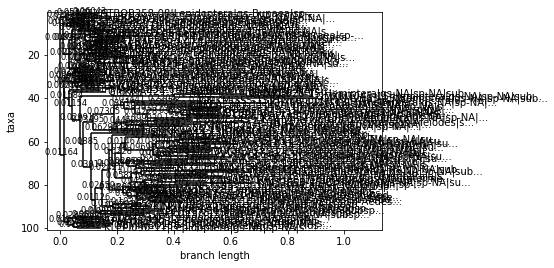

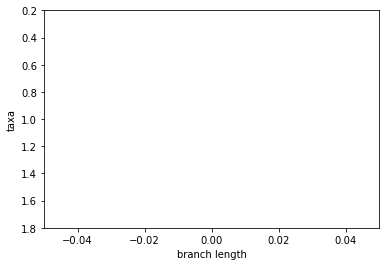

In [5]:
trees = Phylo.parse("/home/kibet/bioinformatics/github/co1_metaanalysis/data/output/alignment/pasta_output/aligned/COI_testa00_data.tre","newick")
for tree in trees:
    Phylo.draw(tree, branch_labels=lambda c: c.branch_length)

## Using Tree and Clade Objects
Here is the [documentation](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc209) on how to access and manipulate the tree objects

In [19]:
dir(Phylo)

['BaseTree',
 'CDAO',
 'NeXML',
 'NeXMLIO',
 'Newick',
 'NewickIO',
 'NexusIO',
 'PhyloXML',
 'PhyloXMLIO',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_cdao_owl',
 '_io',
 '_utils',
 'convert',
 'draw',
 'draw_ascii',
 'draw_graphviz',
 'parse',
 'read',
 'to_networkx',
 'write']

In [21]:
dir(Phylo.__package__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']